In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style()

##### Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree

In [2]:
def polynomial_dataframe(feature, degree): 
    """
    feature is pandas.Series type
    assume that degree >= 1
    """ 
    
    # initialize the dataframe and remove former name first
    feature.name = None
    poly_dataframe = pd.DataFrame(feature, columns=['power_1'])
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree + 1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            
            # assign poly_dataframe[name] to be feature^power; may use apply(*) 
            poly_dataframe[name] = poly_dataframe['power_1'] ** power
            
    return poly_dataframe

##### For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [4]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


#### sort with sqft_livng

In [8]:
sales = sales.sort_values('sqft_living')[['sqft_living', 'price']]

#####  Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature
#####  Add sales[‘price’] to poly1_data as this will be our output variable

In [11]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']

In [12]:
poly1_data.head()

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0
860,380.0,245000.0
18379,384.0,265000.0
4868,390.0,228000.0


#### Fit a linear regression model use sklearn 

In [13]:
model1 = LinearRegression()

In [15]:
# pay attention that use poly1_data[['power_1']] this can give 2D array
model1.fit(poly1_data[['power_1']], poly1_data[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. 

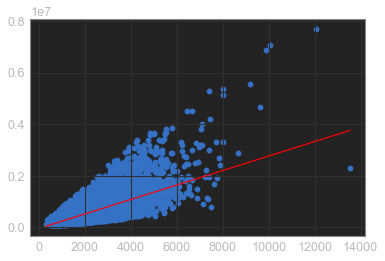

In [19]:
# use model1 to make prediction
predict1 = model1.predict(poly1_data[['power_1']])
# draw picture
plt.scatter(poly1_data['power_1'], poly1_data['price'])
plt.plot(poly1_data['power_1'], predict1, 'red');

#### Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial

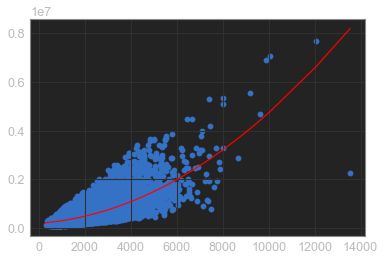

In [20]:
# try it again using a 2nd degree
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']
model2 = LinearRegression()
model2.fit(poly2_data[['power_1', 'power_2']], poly2_data[['price']])
predict2 = model2.predict(poly2_data[['power_1', 'power_2']])
plt.scatter(poly2_data['power_1'], poly2_data['price'])
plt.plot(poly2_data['power_1'], predict2, 'red');

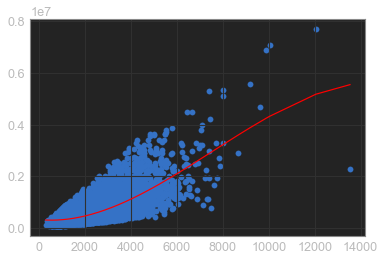

In [21]:
# try it again using a 3rd degree
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']
model3 = LinearRegression()
model3.fit(poly3_data[['power_1', 'power_2', 'power_3']], poly3_data['price'])
predict3 = model3.predict(poly3_data[['power_1', 'power_2', 'power_3']])
plt.scatter(poly3_data['power_1'], poly3_data['price'])
plt.plot(poly3_data['power_1'], predict3, 'red');

#### Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [22]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']

In [23]:
model15 = LinearRegression()

In [24]:
model15.fit(poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']], poly15_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
predict15 = model15.predict(poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']])

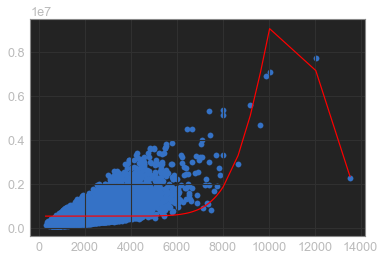

In [26]:
plt.scatter(poly15_data['power_1'], poly15_data['price'])
plt.plot(poly15_data['power_1'], predict15, 'red');

In [28]:
model15.coef_, model15.intercept_

(array([ 4.56404164e-91,  6.91713530e-51, -5.84668843e-56,  0.00000000e+00,
         0.00000000e+00,  2.68575170e-71,  2.26147568e-67,  1.85900299e-63,
         1.47144116e-59,  1.09771012e-55,  7.43509038e-52,  4.23015578e-48,
         1.61618577e-44, -2.49283826e-48,  9.59718336e-53]), 537116.3296376581)

#### Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

In [29]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [31]:
# get feature data
set_1_poly15_data = polynomial_dataframe(set_1['sqft_living'], 15)
set_2_poly15_data = polynomial_dataframe(set_2['sqft_living'], 15)
set_3_poly15_data = polynomial_dataframe(set_3['sqft_living'], 15)
set_4_poly15_data = polynomial_dataframe(set_4['sqft_living'], 15)

set_1_poly15_data['price'] = set_1['price']
set_2_poly15_data['price'] = set_2['price']
set_3_poly15_data['price'] = set_3['price']
set_4_poly15_data['price'] = set_4['price']

In [32]:
set_1_model15 = LinearRegression()
set_2_model15 = LinearRegression()
set_3_model15 = LinearRegression()
set_4_model15 = LinearRegression()

In [33]:
set_1_model15.fit(set_1_poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']], set_1_poly15_data['price'])
set_2_model15.fit(set_2_poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']], set_2_poly15_data['price'])
set_3_model15.fit(set_3_poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']], set_3_poly15_data['price'])
set_4_model15.fit(set_4_poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']], set_4_poly15_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# make prediction
set_1_predict15 = set_1_model15.predict(set_1_poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']])
set_2_predict15 = set_2_model15.predict(set_2_poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']])
set_3_predict15 = set_3_model15.predict(set_3_poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']])
set_4_predict15 = set_4_model15.predict(set_4_poly15_data[['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6',
                        'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12',
                        'power_13', 'power_14', 'power_15']])

[ 1.76203652e-05  4.45076625e-02  4.14384165e-06 -4.48307010e-10
 -2.26018055e-14  9.70509375e-17 -7.09553917e-16  2.96349712e-16
 -1.75470044e-16 -1.28716482e-15  1.17961196e-16  5.58580959e-16
  1.98625838e-16 -3.20923843e-16 -3.78169718e-16] 274692.63319216867


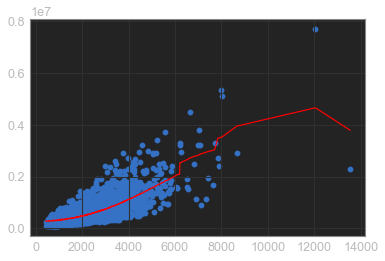

In [36]:
plt.scatter(set_1_poly15_data['power_1'], set_1_poly15_data['price'])
plt.plot(set_1_poly15_data['power_1'], set_1_predict15, 'red');
print(set_1_model15.coef_, set_1_model15.intercept_)

[ 3.00249710e-05  6.12987957e-02 -2.48027357e-06  1.09033033e-10
 -1.77116221e-14  8.06650285e-16 -3.62410187e-16 -2.87698465e-16
 -6.00401398e-16  3.74700271e-16  7.13405029e-16  7.59808882e-16
  1.04430353e-15 -4.64905892e-16  1.34614542e-15] 255850.88504579756


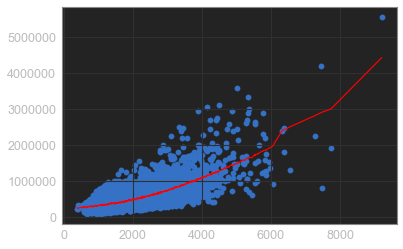

In [37]:
plt.scatter(set_2_poly15_data['power_1'], set_2_poly15_data['price'])
plt.plot(set_2_poly15_data['power_1'], set_2_predict15, 'red');
print(set_2_model15.coef_, set_2_model15.intercept_)

[ 3.06040268e-05  6.77524111e-02 -5.35887341e-06  4.62209845e-10
 -1.31485745e-14 -1.51710440e-16 -3.47081236e-16  5.71090970e-16
  4.30978852e-16  5.27355937e-16 -2.23779328e-16  1.12410081e-15
  6.17561557e-16  3.22658567e-16 -2.42861287e-16] 251836.00049378828


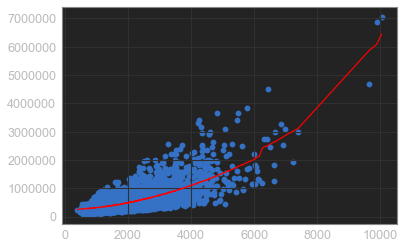

In [38]:
plt.scatter(set_3_poly15_data['power_1'], set_3_poly15_data['price'])
plt.plot(set_3_poly15_data['power_1'], set_3_predict15, 'red');
print(set_3_model15.coef_, set_3_model15.intercept_)

[ 2.92540496e-05  5.47251806e-02 -1.42373522e-06  7.25740602e-11
  3.46694823e-14 -1.24673611e-15 -4.07413734e-16  8.95104966e-16
 -4.92892596e-16 -5.34294831e-16  2.67147415e-16  3.95516953e-16
  2.91433544e-16 -1.03562992e-15 -3.26128013e-16] 269787.5736404573


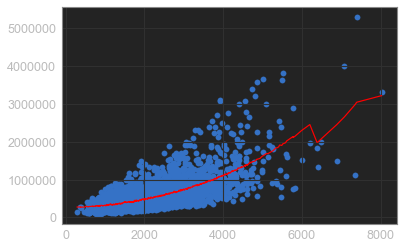

In [39]:
plt.scatter(set_4_poly15_data['power_1'], set_4_poly15_data['price'])
plt.plot(set_4_poly15_data['power_1'], set_4_predict15, 'red');
print(set_4_model15.coef_, set_4_model15.intercept_)

In [163]:
np.sign(model15.coef_) == np.sign(set_1_model15.coef_)

array([ True,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False])

In [164]:
np.sign(model15.coef_) == np.sign(set_2_model15.coef_)

array([ True,  True, False,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False])

In [165]:
np.sign(model15.coef_) == np.sign(set_3_model15.coef_)

array([ True,  True,  True, False, False, False, False,  True,  True,
        True, False,  True,  True, False, False])

In [166]:
np.sign(model15.coef_) == np.sign(set_4_model15.coef_)

array([ True,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False])

#### Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree.

In [56]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [57]:
validation_data.columns == train_data.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [58]:
def different_degree(train_data, valid_data, degree):
    # get feature dataframe
    poly_data_set_train = polynomial_dataframe(train_data['sqft_living'], degree)
    poly_data_set_vaild = polynomial_dataframe(valid_data['sqft_living'], degree)
    
    features_name = poly_data_set_train.columns
    poly_data_set_train['price'] = train_data['price']
    
    mymodel = LinearRegression()
    mymodel.fit(poly_data_set_train[features_name], poly_data_set_train['price'])
    # Compute the RSS on VALIDATION for the current model (print or save the RSS)
    # formula of RSS np.sum((true - predicted) ** 2)
    RSS_valid = np.sum((valid_data['price'] - mymodel.predict(poly_data_set_vaild[features_name])) ** 2)
    
    return RSS_valid

In [59]:
RSS_list = list()
for i in range(1, 16):
    RSS_list.append(different_degree(train_data, validation_data, i))

In [71]:
best_degree = np.array(RSS_list).argmin() + 1

In [73]:
best_degree

6

#### Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

In [74]:
RSS_test = different_degree(train_data, test_data, 6)

In [75]:
RSS_test

135225114656623.0